In [107]:
!pip install numpy pandas seaborn matplotlib wordcloud

In [108]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sys
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [109]:
df_recipes = pd.read_csv('data/IndianFoodDatasetCSV.csv')

In [110]:
df_recipes.head()

,Srno,RecipeName,TranslatedRecipeName,Ingredients,TranslatedIngredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,Instructions,TranslatedInstructions,URL
0,1,Masala Karela Recipe,Masala Karela Recipe,"6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...","6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...",15,30,45,6,Indian,Side Dish,Diabetic Friendly,"To begin making the Masala Karela Recipe,de-se...","To begin making the Masala Karela Recipe,de-se...",https://www.archanaskitchen.com/masala-karela-...
1,2,टमाटर पुलियोगरे रेसिपी - Spicy Tomato Rice (Re...,Spicy Tomato Rice (Recipe),"2-1/2 कप चावल - पका ले,3 टमाटर,3 छोटा चमच्च बी...","2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...",5,10,15,3,South Indian Recipes,Main Course,Vegetarian,टमाटर पुलियोगरे बनाने के लिए सबसे पहले टमाटर क...,"To make tomato puliogere, first cut the tomato...",http://www.archanaskitchen.com/spicy-tomato-ri...
2,3,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,"1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...","1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...",20,30,50,4,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,"To begin making the Ragi Vermicelli Recipe, fi...","To begin making the Ragi Vermicelli Recipe, fi...",http://www.archanaskitchen.com/ragi-vermicelli...
3,4,Gongura Chicken Curry Recipe - Andhra Style Go...,Gongura Chicken Curry Recipe - Andhra Style Go...,"500 grams Chicken,2 Onion - chopped,1 Tomato -...","500 grams Chicken,2 Onion - chopped,1 Tomato -...",15,30,45,4,Andhra,Lunch,Non Vegeterian,To begin making Gongura Chicken Curry Recipe f...,To begin making Gongura Chicken Curry Recipe f...,http://www.archanaskitchen.com/gongura-chicken...
4,5,आंध्रा स्टाइल आलम पचड़ी रेसिपी - Adrak Chutney ...,Andhra Style Alam Pachadi Recipe - Adrak Chutn...,"1 बड़ा चमच्च चना दाल,1 बड़ा चमच्च सफ़ेद उरद दाल,2...","1 tablespoon chana dal, 1 tablespoon white ura...",10,20,30,4,Andhra,South Indian Breakfast,Vegetarian,आंध्रा स्टाइल आलम पचड़ी बनाने के लिए सबसे पहले ...,"To make Andhra Style Alam Pachadi, first heat ...",https://www.archanaskitchen.com/andhra-style-a...


### There are 200k plus recipes in the dataset

In [111]:
df_recipes.shape

(6871, 15)

In [112]:
def split_row(row):
    return pd.Series(row.strip('[').strip(']').split(','))

In [113]:
df_recipes.isna().sum()

Srno                      0
RecipeName                0
TranslatedRecipeName      0
Ingredients               6
TranslatedIngredients     6
PrepTimeInMins            0
CookTimeInMins            0
TotalTimeInMins           0
Servings                  0
Cuisine                   0
Course                    0
Diet                      0
Instructions              0
TranslatedInstructions    0
URL                       0
dtype: int64

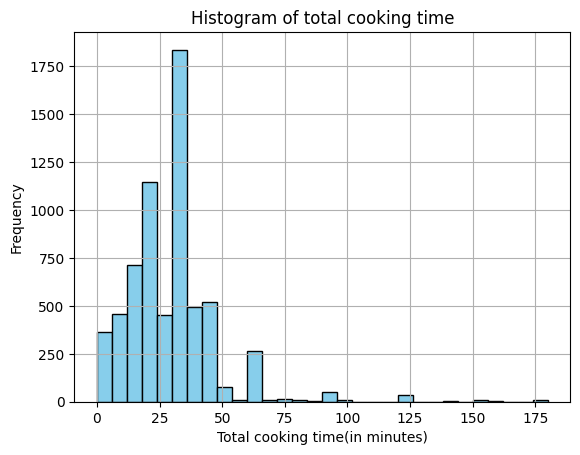

<Figure size 2400x1800 with 0 Axes>

In [122]:
df_recipes = df_recipes[(df_recipes['CookTimeInMins'] <= 180) & (df_recipes['Servings']<=30) & (df_recipes['PrepTimeInMins']<=100)]

plt.hist(df_recipes['CookTimeInMins'], bins=30, color='skyblue', edgecolor='black')  # Adjust bins and colors as needed
plt.title('Histogram of total cooking time')  # Add title
plt.xlabel('Total cooking time(in minutes)')  # Add x-axis label
plt.ylabel('Frequency')  # Add y-axis label
plt.grid(True)  # Add grid
plt.figure(figsize=(24, 18))
plt.show()

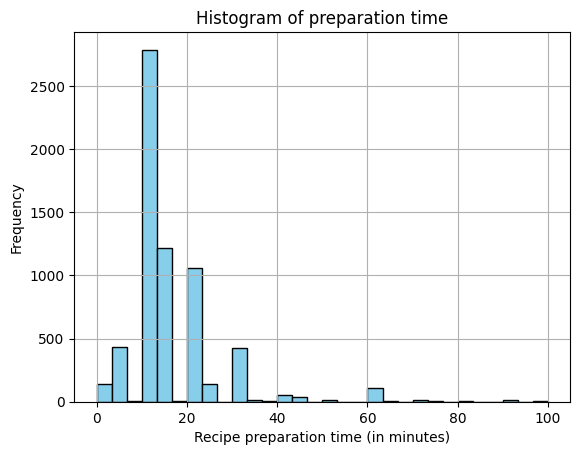

In [123]:

plt.hist(df_recipes['PrepTimeInMins'], bins=30, color='skyblue', edgecolor='black')  # Adjust bins and colors as needed
plt.title('Histogram of preparation time')  # Add title
plt.xlabel('Recipe preparation time (in minutes)')  # Add x-axis label
plt.ylabel('Frequency')  # Add y-axis label
plt.grid(True)  # Add grid
plt.show()

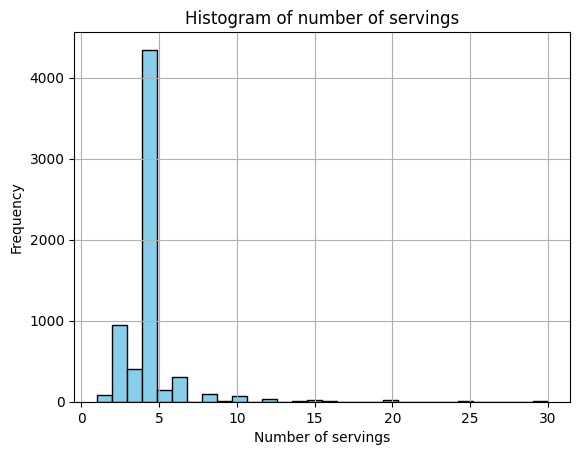

In [124]:

plt.hist(df_recipes['Servings'], bins=30, color='skyblue', edgecolor='black')  # Adjust bins and colors as needed
plt.title('Histogram of number of servings') 
plt.xlabel('Number of servings')  
plt.ylabel('Frequency')  # Add y-axis label
plt.grid(True)  # Add grid
plt.show()

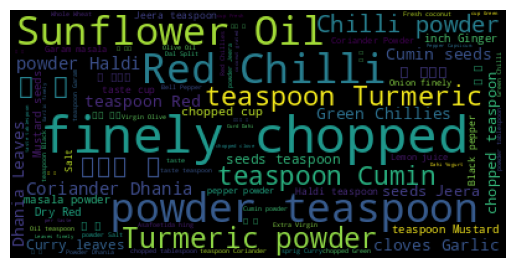

<Figure size 2400x1800 with 0 Axes>

In [125]:
def split_row_str(row):
    return str(row)
wordcloud = WordCloud().generate(','.join(df_recipes['TranslatedIngredients'].apply(split_row_str)) )

plt.imshow(wordcloud)
plt.axis("off")
plt.figure(figsize=(24,18))
plt.show()


In [126]:
df_recipes['Diet'].unique()

array(['Diabetic Friendly', 'Vegetarian', 'High Protein Vegetarian',
       'Non Vegeterian', 'High Protein Non Vegetarian', 'Eggetarian',
       'Vegan', 'No Onion No Garlic (Sattvic)', 'Gluten Free',
       'Sugar Free Diet'], dtype=object)

In [127]:
df_recipes['Cuisine'].unique()

array(['Indian', 'South Indian Recipes', 'Andhra', 'Udupi', 'Mexican',
       'Fusion', 'Continental', 'Bengali Recipes', 'Punjabi', 'Chettinad',
       'Tamil Nadu', 'Maharashtrian Recipes', 'North Indian Recipes',
       'Italian Recipes', 'Sindhi', 'Thai', 'Chinese', 'Kerala Recipes',
       'Gujarati Recipes\ufeff', 'Coorg', 'Rajasthani', 'Asian',
       'Middle Eastern', 'Coastal Karnataka', 'Kashmiri', 'Karnataka',
       'Lucknowi', 'Hyderabadi', 'Side Dish', 'Goan Recipes', 'Arab',
       'Assamese', 'Bihari', 'Malabar', 'Himachal', 'Awadhi', 'Cantonese',
       'North East India Recipes', 'Sichuan', 'Mughlai', 'Japanese',
       'Mangalorean', 'Vietnamese', 'British', 'North Karnataka',
       'Parsi Recipes', 'Greek', 'Nepalese', 'Oriya Recipes', 'French',
       'Konkan', 'Mediterranean', 'Sri Lankan', 'European', 'Haryana',
       'Uttar Pradesh', 'Malvani', 'Indonesian', 'Indo Chinese',
       'African', 'Shandong', 'Korean', 'American', 'Kongunadu',
       'Pakistani', 'C

In [128]:
df_recipes['Course'].unique()

array(['Side Dish', 'Main Course', 'South Indian Breakfast', 'Lunch',
       'Snack', 'High Protein Vegetarian', 'Dinner', 'Appetizer',
       'Indian Breakfast', 'Dessert', 'North Indian Breakfast',
       'One Pot Dish', 'World Breakfast', 'Non Vegeterian', 'Vegetarian',
       'Eggetarian', 'No Onion No Garlic (Sattvic)', 'Brunch', 'Vegan',
       'Sugar Free Diet'], dtype=object)